# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
checkpoints = r'C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [4]:
train_dir = r'D:\Engr Course\VSCode\ML\archive1\Computer vision\train'
validation_dir = r'D:\Engr Course\VSCode\ML\archive1\Computer vision\validation'
test_dir = r'D:\Engr Course\VSCode\ML\archive1\Computer vision\test'

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

d:\Engr Course\VSCode\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,729 (1.04 MB)

 Trainable params: 273,729 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 240 images belonging to 2 classes.


Found 60 images belonging to 2 classes.


In [10]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [12]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - acc: 0.4809 - loss: 0.6942
Epoch 1: val_loss improved from inf to 0.69202, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0001-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 566ms/step - acc: 0.4809 - loss: 0.6941 - val_acc: 0.5000 - val_loss: 0.6920
Epoch 2/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - acc: 0.4375 - loss: 0.6944

d:\Engr Course\VSCode\ML\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.69202
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 0.4375 - loss: 0.6944 - val_acc: 0.5167 - val_loss: 0.6922
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - acc: 0.5545 - loss: 0.6919
Epoch 3: val_loss improved from 0.69202 to 0.69168, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0003-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - acc: 0.5555 - loss: 0.6919 - val_acc: 0.5000 - val_loss: 0.6917
Epoch 4/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - acc: 0.5000 - loss: 0.6903
Epoch 4: val_loss did not improve from 0.69168
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.5000 - loss: 0.6903 - val_acc: 0.5000 - val_loss: 0.6917
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - acc: 0.5151 - loss: 0.6902
Epoch 5: val_loss improved from 0.69168 to 0.69040, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0005-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - acc: 0.5156 - loss: 0.6902 - val_acc: 0.5000 - val_loss: 0.6904
Epoch 6/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - acc: 0.5000 - loss: 0.6891
Epoch 6: val_loss did not improve from 0.69040
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.5000 - loss: 0.6891 - val_acc: 0.5000 - val_loss: 0.6904
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - acc: 0.5161 - loss: 0.6888
Epoch 7: val_loss improved from 0.69040 to 0.68954, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0007-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - acc: 0.5171 - loss: 0.6889 - val_acc: 0.5000 - val_loss: 0.6895
Epoch 8/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - acc: 0.5312 - loss: 0.6850
Epoch 8: val_loss did not improve from 0.68954
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.5312 - loss: 0.6850 - val_acc: 0.5000 - val_loss: 0.6896
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - acc: 0.5360 - loss: 0.6880
Epoch 9: val_loss improved from 0.68954 to 0.68922, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0009-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - acc: 0.5387 - loss: 0.6878 - val_acc: 0.5000 - val_loss: 0.6892
Epoch 10/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - acc: 0.4688 - loss: 0.6898
Epoch 10: val_loss improved from 0.68922 to 0.68849, saving model to C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0010-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - acc: 0.4688 - loss: 0.6898 - val_acc: 0.5000 - val_loss: 0.6885


In [13]:
model_history.history

{'acc': [0.48076921701431274,
  0.4375,
  0.5625,
  0.5,
  0.5192307829856873,
  0.5,
  0.5240384340286255,
  0.53125,
  0.557692289352417,
  0.46875],
 'loss': [0.6936495304107666,
  0.6944358348846436,
  0.6924620270729065,
  0.6903433799743652,
  0.6902297139167786,
  0.6891059875488281,
  0.6896063685417175,
  0.6849532723426819,
  0.6866734027862549,
  0.6898370981216431],
 'val_acc': [0.5, 0.5166666507720947, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 'val_loss': [0.6920187473297119,
  0.6921521425247192,
  0.6916819214820862,
  0.6916980743408203,
  0.6903990507125854,
  0.6904159784317017,
  0.6895397901535034,
  0.6895943880081177,
  0.6892231702804565,
  0.6884881258010864]}

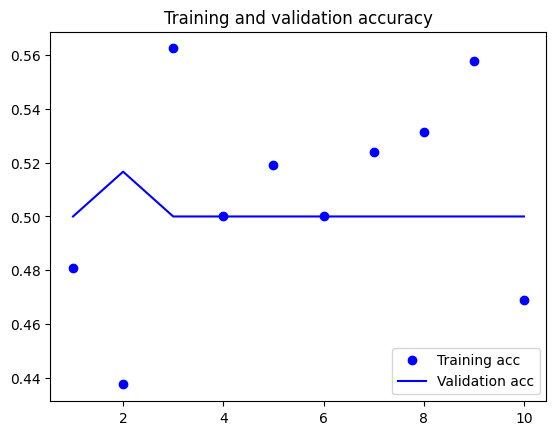

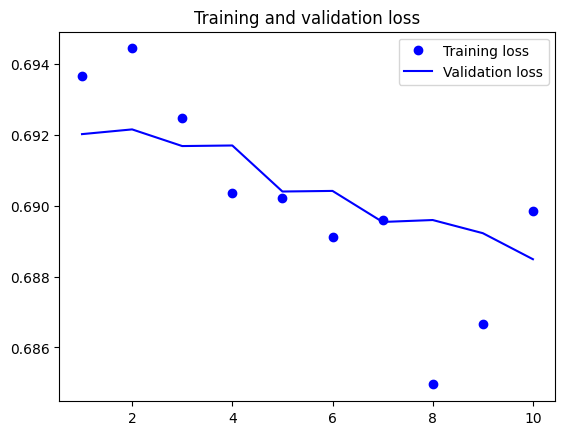

<Figure size 640x480 with 0 Axes>

In [14]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\swiss\Desktop\ML\Lab 12\model_Accuracy.png')

In [15]:
model.save(r'C:\Users\swiss\Desktop\ML\Lab 12\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


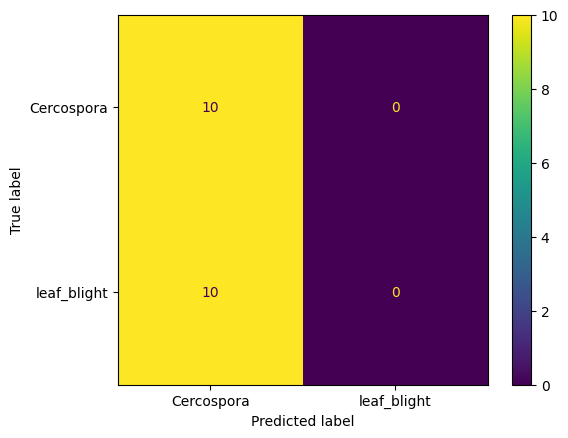

In [16]:
#model = load_model(r'C:\Users\swiss\Desktop\ML\Lab 12\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='binary')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\swiss\Desktop\ML\Lab 12\confusion_matrics.jpg')

In [17]:
print(classification_report(label, pred, target_names=['Cercospora', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.50      1.00      0.67        10
 leaf_blight       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



d:\Engr Course\VSCode\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Engr Course\VSCode\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Engr Course\VSCode\ML\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
